# CS2006 Python Practical 2

# 0. Import the Required Libraries

In [1]:
import pandas as pd

In [28]:
import numpy as np

In [29]:
import matplotlib.pyplot as plt

In [298]:
import json

In [299]:
from wordcloud import WordCloud as wc

In [304]:
df=pd.read_csv("CometLanding.csv")

### Check the Initial Length of the CSV File

In [295]:
len(df)

77319

### Check the Data Type of Each Column

In [296]:
df.dtypes

id_str                       float64
from_user                     object
text                          object
created_at                    object
time                          object
geo_coordinates               object
user_lang                     object
in_reply_to_user_id_str      float64
in_reply_to_screen_name       object
from_user_id_str             float64
in_reply_to_status_id_str    float64
source                        object
profile_image_url             object
user_followers_count         float64
user_friends_count           float64
status_url                    object
entities_str                  object
dtype: object

## 1. Refine the Dataset

### 1) Check Data File for Duplicated Tweets and Remove Duplicates

In [5]:
df.drop_duplicates(['id_str'], inplace = True)

In [6]:
len(df)

77268

### 2) Remove Text That is Null

In [7]:
df = df[df['text'].notnull()]

In [8]:
len(df)

77267

## 2. Perform the Descriptive Analysis of the Dataset

### 1.1) Calculate the Total Number of Tweets

In [11]:
numTweets = len(df[(df['in_reply_to_user_id_str'].notnull() == False) #Filters out replies
                   & (df['text'].str.startswith('RT', na=False) == False)]) #Filters out retweets

In [12]:
print("Total number of tweets (excluding replies and retweets): " 
      + str(numTweets)) #Filters out retweets

Total number of tweets (excluding replies and retweets): 15582


### 1.2) Calculate the Total Number of Retweets

In [13]:
dfRT = df[df.text.str.startswith('RT', na=False)]

In [14]:
numRT = len(dfRT)

In [15]:
print("Total number of retweets: " + str(numRT))

Total number of retweets: 59998


### 1.3) Calculate the Total Number of Replies

In [103]:
dfReplies = df[df['in_reply_to_user_id_str'].notnull()]

In [104]:
numReplies = len(dfReplies)

In [105]:
print("Number of replies: " + str(numReplies))

Number of replies: 1723


### 2) Calculate the Total Number of Different Users Tweeting in this DataSet

In [19]:
numUsers = len(df['from_user'].unique())

In [20]:
print("The number of users: " + str(numUsers))

The number of users: 50195


### 3.1) Calculate the Average Number of Tweets by a User

In [21]:
print("Average number of tweets: ", str(numTweets / numUsers))


Average number of tweets:  0.31042932563004283


### 3.2) Calculate the Average Number of Retweets by a User

In [22]:
print("Average number of retweets: ", str(numRT / numUsers))

Average number of retweets:  1.195298336487698


### 3.3) Calculate the Average Number of Replies Sent by a User

In [23]:
print("Average number of replies: ", str(numReplies / numUsers))

Average number of replies:  0.03432612810040841


### 4) Identify the Most Popular Hashtags

In [400]:
#df["entities_str"] = [str(x) for x in df["entities_str"]]
#print(df["entities_str"])
#data = df.entities_str
#print(data)
#hashtags = ""

#for i in range(0, len(data)):
#    for hashtag in json.loads(data[i])["hashtags"]:
#        hashtags = hashtags + " " + hashtag["text"]
#print(hashtags)

#print(type(data[0]))
#data = {"hashtags":[{"text":"Philae","indices":[49,56]},{"text":"CometLanding","indices":[139,140]}],"symbols":[],"user_mentions":[{"screen_name":"VersaTechnology","name":"Versa Technology","id":30264992,"id_str":"30264992","indices":[3,19]},{"screen_name":"Philae2014","name":"Philae Lander","id":208442526,"id_str":"208442526","indices":[37,48]}],"urls":[{"url":"http://t.co/6SoGeZTS9N","expanded_url":"http://cnn.it/1qDQu0s","display_url":"cnn.it/1qDQu0s","indices":[139,140]}]}
#for text in hashtag_df[0]:
#    print(text["text"])
#json.loads(data)
#pd.concat([pd.Series(json.loads(line)) for line in data], axis=1)
#hashtag_df = pd.DataFrame.from_dict((data), orient='columns')
#print(pd.io.json.json_normalize(hashtag_df))
#df.join(df["entities_str"].apply(json.loads).apply(pd.Series))

## 3. Build plots/visualisations

### 3.1) The structure of the dataset

In [25]:
structure_names = ["Tweets", "Retweets", "Replies"]

In [26]:
structure_data = [numTweets, numRT, numReplies]

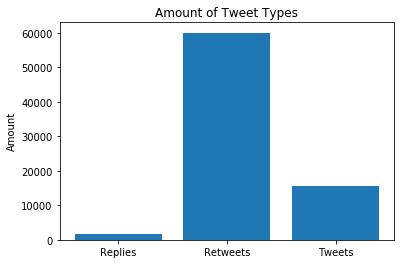

In [44]:
plt.bar(structure_names, structure_data, align="center")
plt.ylabel('Amount')
plt.title('Amount of Tweet Types')
plt.show()

### 3.2) The timeline of the tweets activity

In [216]:
df.time = [str(x) for x in df["time"]]
df.time = [x.split(" ")[0] for x in df["time"]]
df.time = pd.to_datetime(df.time, dayfirst=True)

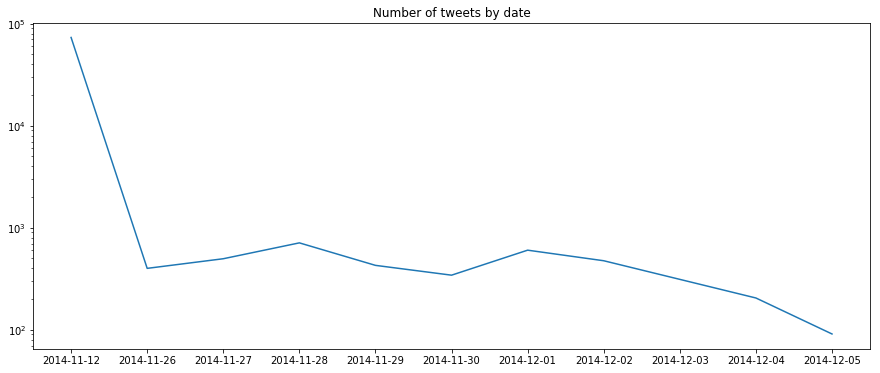

In [232]:
plt.rcParams["figure.figsize"] = [15, 6]
#values = df["time"].value_counts()
#values.index = pd.to_datetime(values.index)
#values = values.sort_index()
values = pd.DataFrame(df["time"].value_counts().reset_index())
values.columns = ["date", "amount"]
values = values.sort_values(by="date")
plt.plot([str(x).split(" ")[0] for x in values.date], values.amount)
plt.yscale("log")
plt.title("Number of tweets by date")

#for i in values:
    #plt.annotate(values.amount[i], (values.date[i], values.amount[i])
    
plt.show()

### 3.3) Word cloud for hashtags

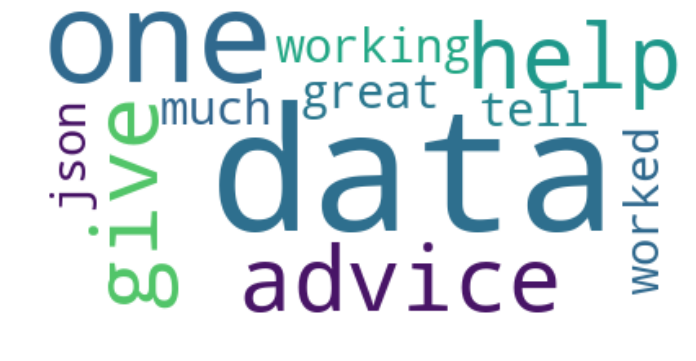

In [265]:
text = "If any one can help or give some advice on working with this data that would be great! If you can't tell I haven't worked much with json data before..."
word_cloud = wc(background_color="white").generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

plt.show()
